In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/11월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.500000,0.558333,0.895522,0.124267,2.180543,1.396305,4.979928,3.188884
1,중랑구,(구)신한은행 중랑교지점,1,0.375000,0.200000,1.875000,0.477660,3.998480,3.019091,20.413146,15.413146
2,중랑구,(구)신한은행 중랑교지점,2,0.233333,0.300000,0.777778,0.081234,1.794085,1.079489,8.368764,5.035431
3,중랑구,(구)신한은행 중랑교지점,3,0.216667,0.125000,1.733333,0.439274,3.866071,2.894146,31.821982,23.821982
4,중랑구,(구)신한은행 중랑교지점,4,0.150000,0.100000,1.500000,0.365414,3.577444,2.625564,37.582938,27.582938
...,...,...,...,...,...,...,...,...,...,...,...
49610,강서구,힐스테이트에코,19,1.275000,1.241667,1.026846,0.112335,4.718298,3.806804,4.168946,3.363577
49611,강서구,힐스테이트에코,20,0.958333,1.166667,0.821429,0.035349,2.973966,2.181574,3.216985,2.359842
49612,강서구,힐스테이트에코,21,0.683333,0.766667,0.891304,0.056449,3.571192,2.730200,5.538793,4.234445
49613,강서구,힐스테이트에코,22,0.583333,0.741667,0.786517,0.027038,2.688070,1.922819,4.736177,3.387863


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.500000,0.558333,0.895522,2.180543,4.979928
1,중랑구,(구)신한은행 중랑교지점,1,0.375000,0.200000,1.875000,3.998480,20.413146
2,중랑구,(구)신한은행 중랑교지점,2,0.233333,0.300000,0.777778,1.794085,8.368764
3,중랑구,(구)신한은행 중랑교지점,3,0.216667,0.125000,1.733333,3.866071,31.821982
4,중랑구,(구)신한은행 중랑교지점,4,0.150000,0.100000,1.500000,3.577444,37.582938


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.173898,0.278654,0.253177,0.527774,0.358645,0.43032,0.313393,0.224396,0.442678,0.274642,0.39047,0.266211,0.39665,0.224106,0.204603,0.365103,0.308621,0.357331,0.438524,0.49031,0.239262,0.263929,0.297293,0.253183,0.294789


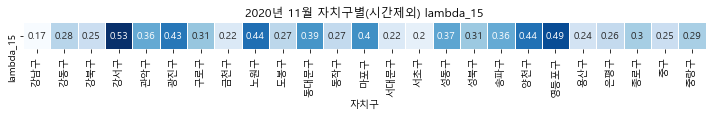

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.205234,0.349497,0.250873,0.642142,0.525893,0.494795,0.465069,0.342744,0.435507,0.281153,0.383495,0.308938,0.458159,0.247093,0.27609,0.482292,0.361764,0.407085,0.487232,0.599621,0.276539,0.359714,0.331927,0.283544,0.292816


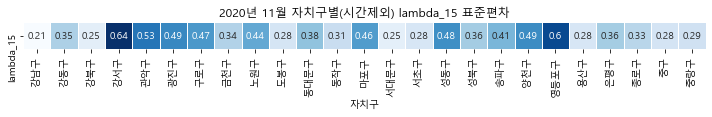

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.183994,0.272315,0.253471,0.524202,0.361392,0.429303,0.310603,0.226057,0.441019,0.270064,0.383871,0.262372,0.389755,0.236225,0.207964,0.359274,0.308621,0.353642,0.43495,0.491598,0.23808,0.257356,0.311023,0.270259,0.289138


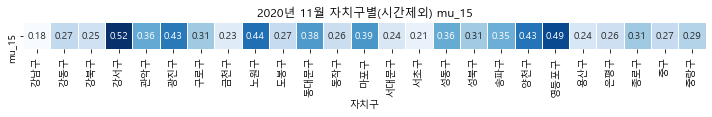

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.205443,0.32335,0.243321,0.609727,0.474323,0.450399,0.448669,0.326091,0.424591,0.255841,0.363347,0.262377,0.423271,0.230729,0.258923,0.445869,0.322641,0.401887,0.453614,0.573762,0.270803,0.308269,0.329643,0.285622,0.26855


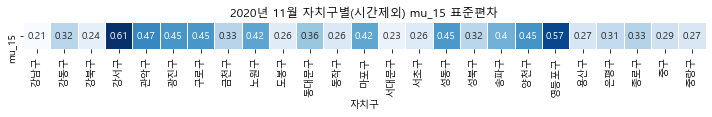

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.164674,1.185891,1.233223,1.336261,1.136537,1.141683,1.323576,1.683442,1.204736,1.291264,1.294996,1.145656,1.295891,1.153765,1.09682,1.272492,1.184092,1.172426,1.253619,1.350462,1.252818,1.176339,1.184973,1.135037,1.171559


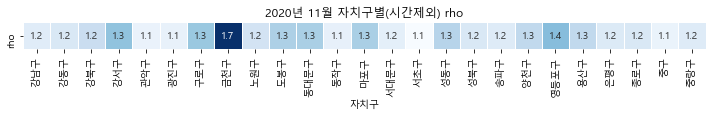

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.674543,1.27771,1.062347,2.692584,1.752795,2.119679,1.452991,0.890169,2.266299,1.315376,1.936345,1.223534,2.110771,0.931513,0.95305,1.849629,1.507714,1.830509,2.276762,2.549604,1.199091,1.328843,1.443024,1.137992,1.400205


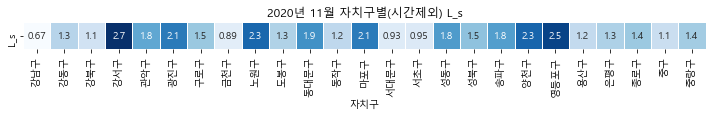

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.798614,1.598507,1.043419,3.126568,2.880875,2.646237,2.053374,1.147821,2.123935,1.475991,1.640822,1.394995,2.432774,1.092279,1.345801,2.401015,1.825108,2.186844,2.348863,2.837624,1.495628,2.122771,1.535037,1.198391,1.410497


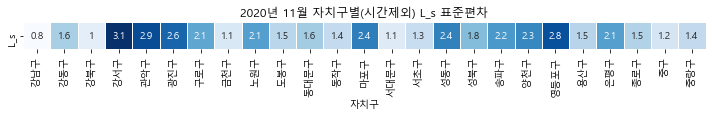

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,12.427507,13.207262,11.489427,19.845793,11.712891,14.974225,16.394503,16.390048,16.526487,15.936742,17.192517,11.534617,20.494024,11.407771,14.325483,19.222555,13.710888,17.76311,18.8879,24.154729,17.568405,12.26571,19.690633,17.024006,11.462139


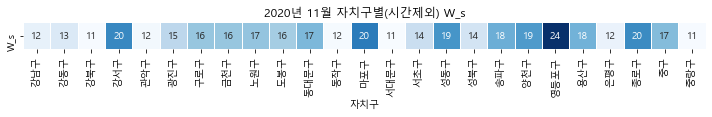

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,33.67427,36.559007,22.852893,59.621175,28.804826,37.543862,50.61471,37.288027,42.487569,45.502248,41.575199,28.771897,55.430257,23.565563,42.252614,55.973713,31.807705,49.970016,51.592582,69.047744,50.806061,37.189202,61.01071,47.619445,22.993379


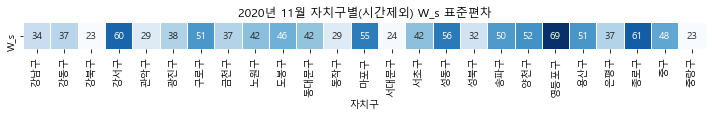

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.103333  0.099082  0.087108  0.059829  0.033547  0.023291  0.035399   
강동구  0.175085  0.161686  0.132647  0.084804  0.044706  0.059706  0.091078   
강북구  0.202564  0.208182  0.160606  0.120758  0.074697  0.059697  0.069242   
강서구  0.256442  0.214050  0.146736  0.105000  0.069653  0.079028  0.143056   
관악구  0.258750  0.262308  0.188281  0.133854  0.091276  0.081901  0.086328   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.133476  0.295228  0.209900  0.149715  0.165313  0.198433  0.214316   
강동구  0.196667  0.381078  0.234314  0.183039  0.207451  0.274902  0.309902   
강북구  0.135606  0.295303  0.209697  0.170152  0.191364  0.237576  0.283030   
강서구  0.426597  1.033611  0.522778  0.375694  0.449444  0.559375  0.602500   
관악구  0.166406  0.399870  0.298568  0.254557  0.272917  0.330469  0.371745   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.212892  0.227137  0.271011  0.342521  0.384972  0.285969  0.191168   
강동구  0.327255  0.367549  0.406863  0.502745  0.625882  0.513922  0.395686   
강북구  0.302424  0.334091  0.367121  0.412273  0.522424  0.425000  0.375000   
강서구  0.610833  0.658125  0.761319  0.982083  1.317708  0.971042  0.746111   
관악구  0.391146  0.423177  0.496484  0.600260  0.864063  0.724349  0.552995   

                                   
시간         21        22        23  
자치구                                
강남구  0.183191  0.158476  0.110684  
강동구  0.396176  0.360392  0.272745  
강북구  0.340303  0.328939  0.259394  
강서구  0.675972  0.593125  0.416389  
관악구  0.538021  0.474740  0.371484

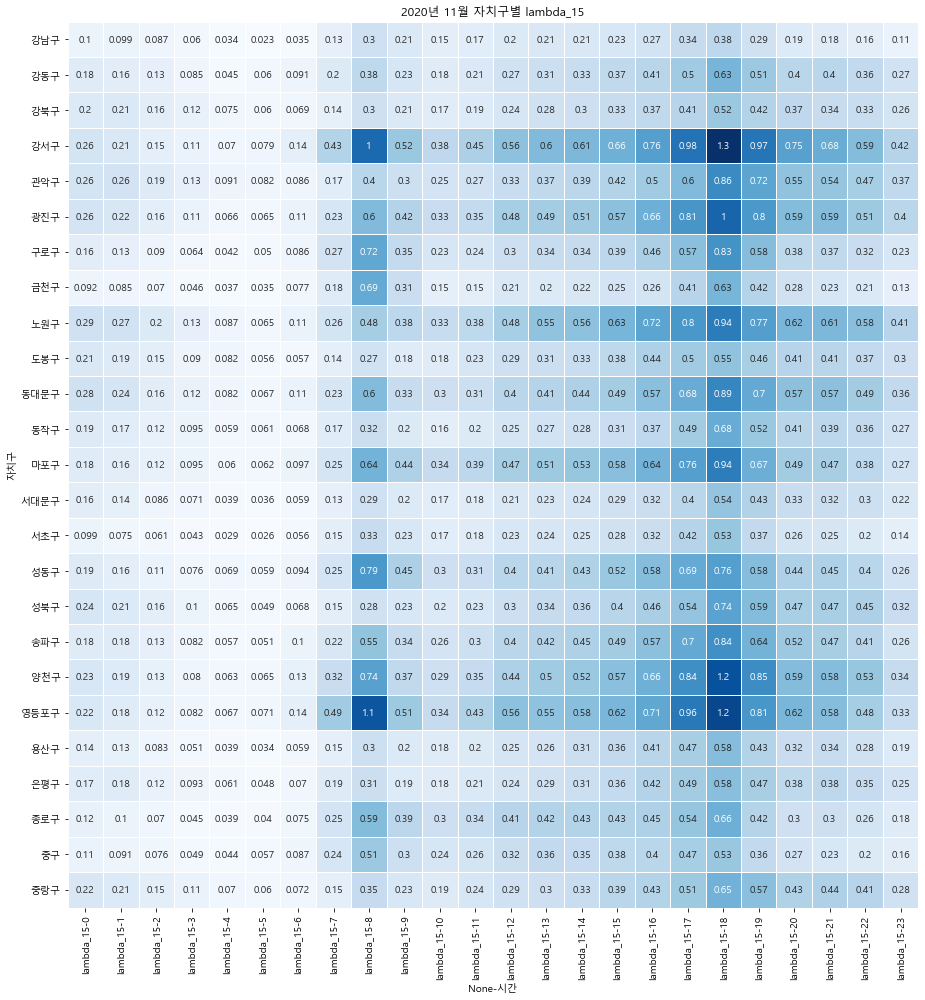

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.104968  0.095094  0.085205  0.069236  0.038085  0.035398  0.049735   
강동구  0.196794  0.175210  0.163912  0.100447  0.055335  0.078066  0.139407   
강북구  0.179572  0.149411  0.142585  0.108924  0.073089  0.075628  0.088829   
강서구  0.234005  0.185071  0.138622  0.104393  0.067776  0.095505  0.213843   
관악구  0.320310  0.251342  0.196725  0.169004  0.103013  0.138193  0.154220   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.223526  0.379974  0.283987  0.160571  0.142732  0.143213  0.167615   
강동구  0.271113  0.550663  0.284723  0.199779  0.187238  0.254687  0.291183   
강북구  0.181468  0.355833  0.189926  0.164255  0.184626  0.196483  0.217679   
강서구  0.632100  1.172963  0.552881  0.389151  0.411646  0.462315  0.517281   
관악구  0.312867  0.598072  0.379628  0.253320  0.282425  0.343551  0.404817   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.174058  0.185451  0.224466  0.260588  0.301755  0.227220  0.153161   
강동구  0.295651  0.348976  0.356499  0.477000  0.613406  0.467059  0.385897   
강북구  0.213315  0.245024  0.291099  0.306517  0.386370  0.311417  0.266087   
강서구  0.504970  0.516763  0.644543  0.877519  1.120761  0.747026  0.582836   
관악구  0.441578  0.477493  0.591695  0.744505  1.053727  0.901578  0.627550   

                                   
시간         21        22        23  
자치구                                
강남구  0.150339  0.118115  0.091620  
강동구  0.364354  0.332043  0.247993  
강북구  0.240342  0.227658  0.190476  
강서구  0.512896  0.429950  0.295124  
관악구  0.648754  0.549820  0.388610

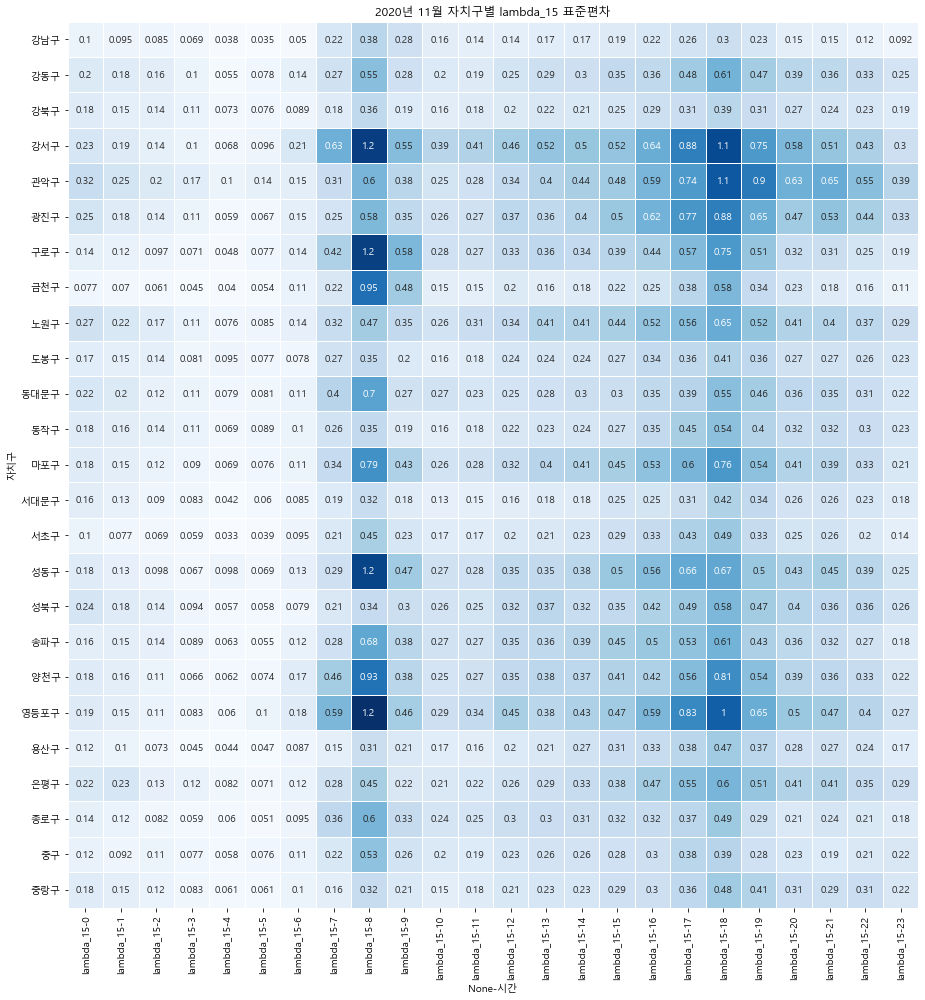

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.112222  0.096610  0.084758  0.055556  0.030983  0.025499  0.052991   
강동구  0.164626  0.143103  0.103039  0.067157  0.042451  0.069706  0.112353   
강북구  0.206282  0.201970  0.151061  0.096364  0.072424  0.063636  0.080000   
강서구  0.241844  0.182782  0.131458  0.095764  0.064167  0.084306  0.170972   
관악구  0.230833  0.218333  0.166797  0.121745  0.079688  0.082422  0.108203   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.133974  0.249573  0.185684  0.148718  0.178846  0.209046  0.220726   
강동구  0.268922  0.439412  0.243922  0.216275  0.248137  0.302745  0.319510   
강북구  0.177727  0.280606  0.233030  0.168939  0.218939  0.268333  0.306212   
강서구  0.508819  1.007014  0.504375  0.395764  0.502083  0.578542  0.627431   
관악구  0.296354  0.559375  0.353125  0.304167  0.320443  0.379427  0.423958   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.241738  0.257051  0.313177  0.411396  0.470442  0.280057  0.214174   
강동구  0.357059  0.368922  0.414020  0.471471  0.547255  0.416569  0.365294   
강북구  0.320606  0.357727  0.380152  0.415455  0.511667  0.387727  0.342273   
강서구  0.630764  0.691597  0.790278  1.045208  1.283750  0.859236  0.700486   
관악구  0.431250  0.455208  0.513151  0.594792  0.736068  0.580469  0.525000   

                                   
시간         21        22        23  
자치구                                
강남구  0.191026  0.152493  0.101709  
강동구  0.343235  0.310882  0.219020  
강북구  0.323939  0.296667  0.230152  
강서구  0.654167  0.518403  0.363889  
관악구  0.496875  0.421094  0.309505

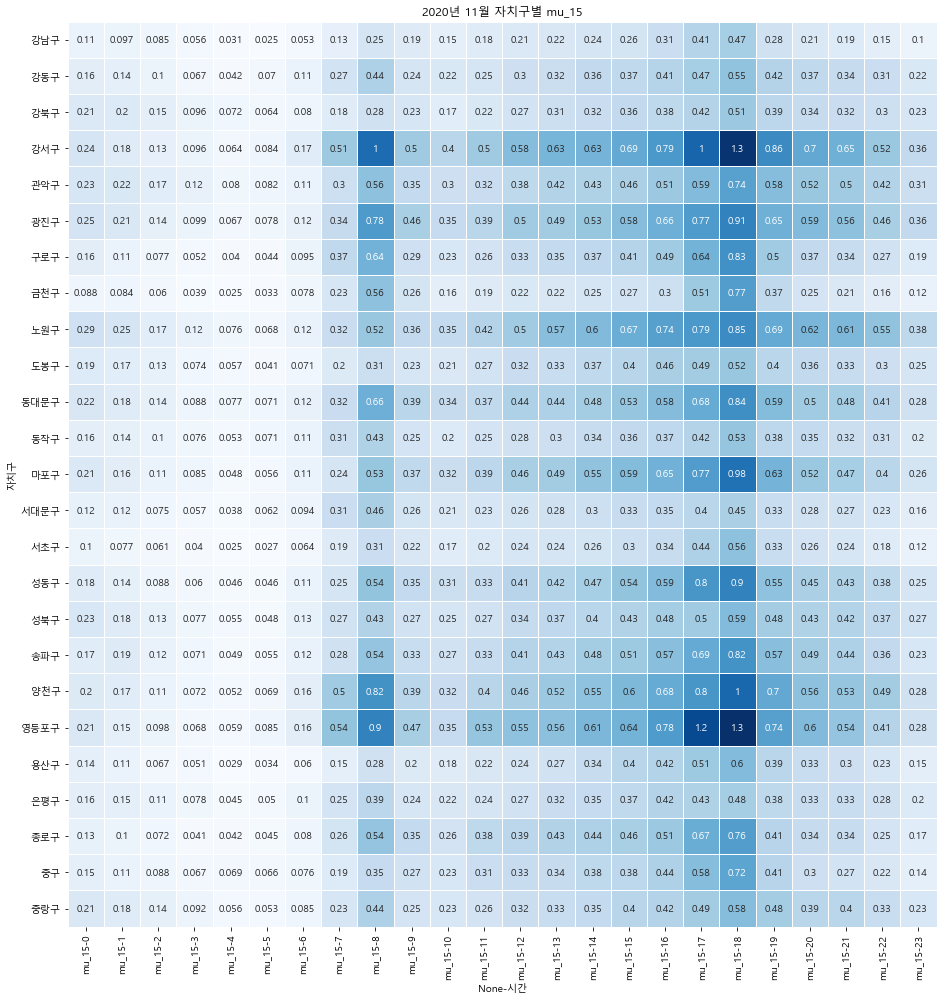

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.082517  0.084354  0.077096  0.054404  0.032732  0.033482  0.069304   
강동구  0.193457  0.166619  0.129284  0.081704  0.069848  0.087833  0.146575   
강북구  0.220573  0.188001  0.153039  0.107974  0.070197  0.067517  0.079294   
강서구  0.254905  0.180357  0.136510  0.095376  0.073500  0.079610  0.152875   
관악구  0.276857  0.225141  0.221713  0.200273  0.102244  0.100089  0.141581   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.144897  0.271657  0.166072  0.110308  0.126625  0.138818  0.152872   
강동구  0.270231  0.473297  0.249892  0.187475  0.218798  0.293239  0.289737   
강북구  0.127143  0.210135  0.152820  0.106047  0.146754  0.175260  0.192251   
강서구  0.439916  0.926458  0.381800  0.272218  0.348410  0.401771  0.457910   
관악구  0.402664  0.661725  0.347647  0.283123  0.317758  0.334169  0.397364   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.178098  0.190236  0.209829  0.348498  0.386039  0.220330  0.166045   
강동구  0.310826  0.328299  0.359513  0.447608  0.531511  0.419140  0.348561   
강북구  0.192976  0.239410  0.240068  0.287771  0.410631  0.327436  0.310933   
강서구  0.453747  0.476232  0.591082  0.858635  1.178523  0.804375  0.621729   
관악구  0.412268  0.466214  0.552150  0.641223  0.821596  0.664905  0.618724   

                                   
시간         21        22        23  
자치구                                
강남구  0.154561  0.127646  0.078262  
강동구  0.323584  0.302188  0.230433  
강북구  0.307080  0.256728  0.200850  
강서구  0.609385  0.449870  0.320140  
관악구  0.598111  0.483128  0.380693

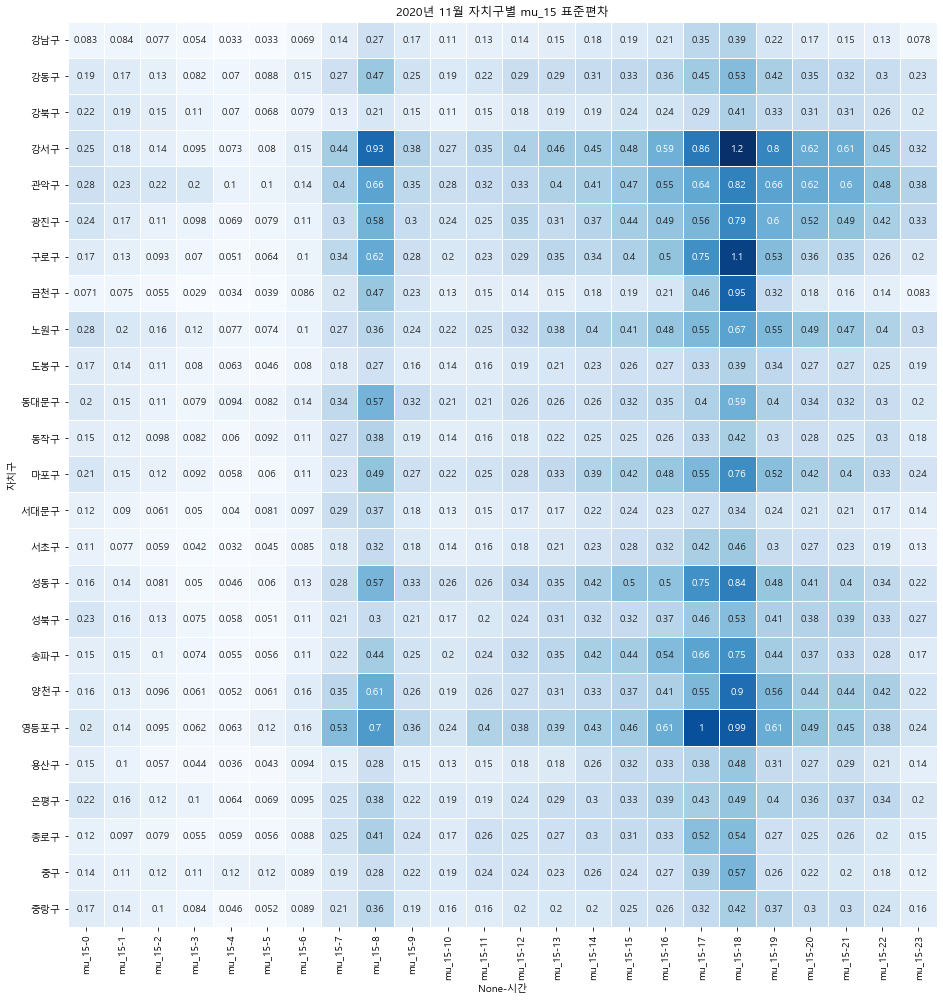

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.864644  1.276923  1.406882  1.156315  1.212444  0.897078  1.185153   
강동구  1.092569  1.123079  1.584204  1.423322  1.341897  1.343840  1.256509   
강북구  1.172985  1.738315  1.711129  1.641843  1.792129  1.435709  1.537408   
강서구  1.192226  1.860089  1.703672  1.386569  1.634941  1.380188  2.646339   
관악구  0.978653  1.291323  1.369595  1.380189  1.293675  1.231658  1.439509   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.482873  2.387665  1.347316  1.111505  0.939705  1.002528  0.966998   
강동구  1.103175  0.914367  1.006757  0.878735  0.907035  0.990456  0.954589   
강북구  0.948857  1.274901  0.931949  0.961182  0.938459  0.879808  0.910318   
강서구  1.587074  2.004722  1.264056  0.980070  0.881907  0.925607  0.945715   
관악구  0.748617  1.650838  0.939215  1.030126  1.134815  0.818390  0.884793   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.912546  0.906182  0.945836  1.005396  0.978443  1.208560  1.042910   
강동구  0.964758  0.995345  1.004334  1.154396  1.379549  1.487662  1.112839   
강북구  0.994359  0.985254  0.909979  1.021745  1.111029  1.186741  1.275759   
강서구  0.949315  0.916403  0.954722  0.998304  1.209889  1.259264  1.161219   
관악구  0.873544  0.996705  0.942725  0.999801  1.303411  1.167453  1.089567   

                                   
시간         21        22        23  
자치구                                
강남구  1.084829  1.317120  1.319065  
강동구  1.356382  1.393380  1.707961  
강북구  1.271934  1.463020  1.513489  
강서구  1.204937  1.391704  1.652177  
관악구  1.150017  1.170130  1.429198

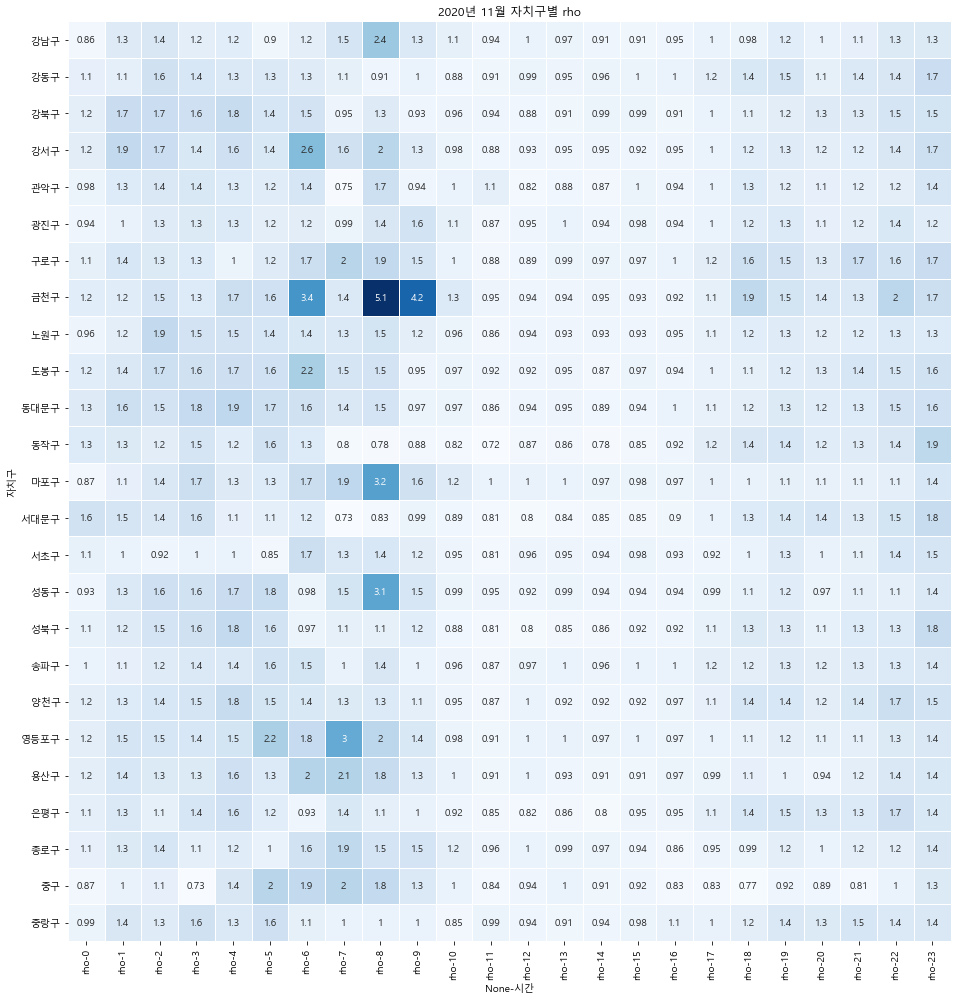

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.615778  0.730976  0.732698  0.722753  0.657057  0.528103  0.589120   
강동구  1.215233  1.379446  1.523847  1.437857  1.305833  1.102284  1.189253   
강북구  0.906461  1.099866  1.108251  1.206843  1.027048  0.863615  0.959096   
강서구  2.203559  2.897828  2.775880  2.642141  2.627323  2.639646  2.263502   
관악구  1.649313  2.116845  2.019389  1.665790  1.866096  1.778565  1.674499   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.726901  0.758029  0.723654  0.695496  0.714439  0.692609  0.710776   
강동구  0.970918  1.045834  1.167584  1.147511  1.052701  1.109815  1.229636   
강북구  1.020888  1.095629  1.047045  1.116654  0.965428  1.024488  1.040998   
강서구  2.425283  2.178067  2.440306  2.677863  2.577570  2.827949  2.759794   
관악구  1.266344  1.286766  1.568807  1.328987  1.467579  1.528123  1.578732   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.643077  0.647822  0.659041  0.639629  0.638646  0.705766  0.617288   
강동구  1.161672  1.330440  1.277157  1.397004  1.470987  1.477070  1.392735   
강북구  1.035513  1.047277  1.102414  1.069119  1.054633  1.155895  1.151848   
강서구  2.786331  2.803107  2.916248  3.071915  2.957215  3.078463  2.955552   
관악구  1.747847  1.655191  1.807277  1.933566  2.168729  2.298047  1.798097   

                                   
시간         21        22        23  
자치구                                
강남구  0.654403  0.667216  0.718779  
강동구  1.423529  1.409459  1.454402  
강북구  1.119709  1.156030  1.149912  
강서구  2.661799  2.787465  2.751077  
관악구  1.944767  2.032846  1.905058

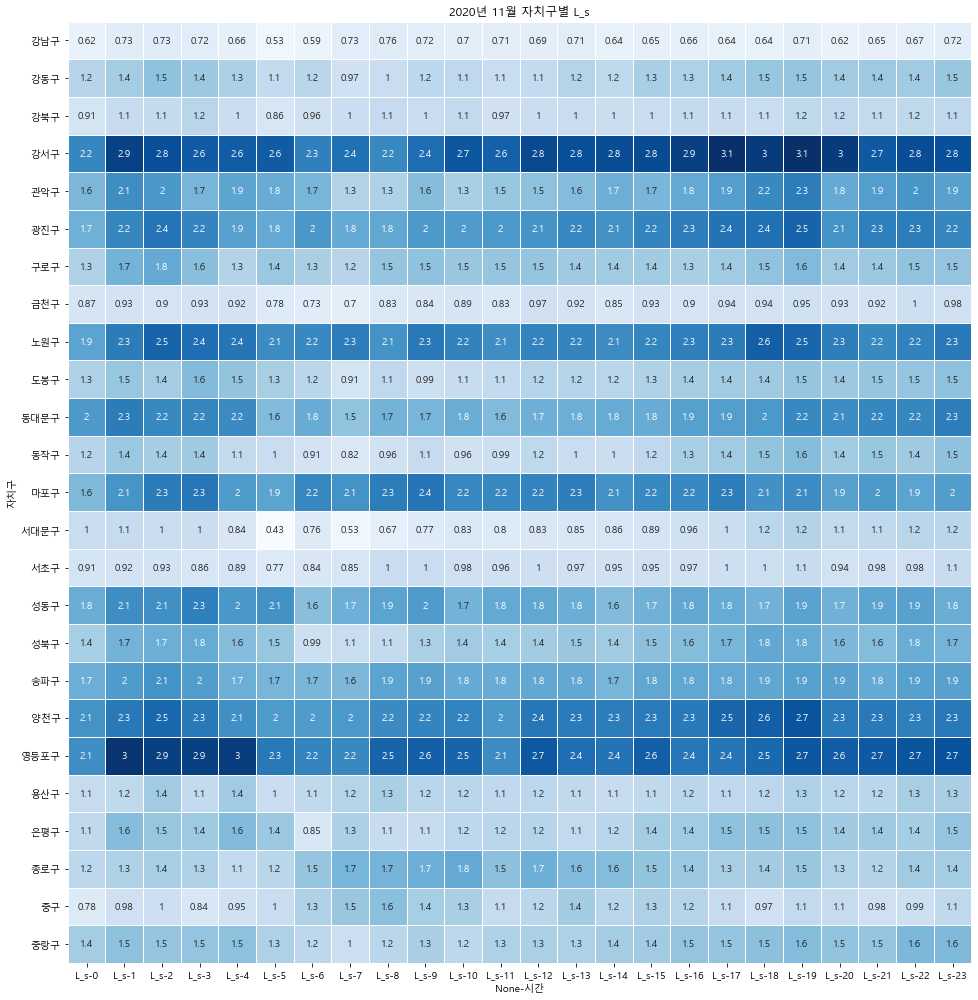

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.741836  0.874370  0.913911  0.884249  0.860498  0.834396  0.971815   
강동구  1.642537  1.599823  1.780547  1.779154  1.890147  1.867896  2.216729   
강북구  0.959404  0.923306  0.897634  1.089245  1.002408  1.155568  1.145016   
강서구  2.415584  2.948068  2.585162  3.085718  3.762244  4.463778  4.025229   
관악구  3.062396  3.116656  3.137475  2.204615  2.973534  3.471552  3.683801   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.990964  0.955598  0.898963  0.866938  0.816116  0.757392  0.759438   
강동구  1.687920  1.600468  1.589974  1.465329  1.098360  1.072095  1.335527   
강북구  1.458830  1.423535  1.149693  1.235194  1.052200  1.039001  1.007884   
강서구  3.671225  2.595387  3.380410  3.790295  3.205448  3.221313  3.060928   
관악구  2.897543  2.483598  2.825263  1.705418  2.633967  2.539276  2.658704   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.673882  0.677587  0.710329  0.686983  0.683976  0.724856  0.629135   
강동구  1.292450  1.547010  1.349258  1.604532  1.682648  1.634574  1.585041   
강북구  0.943404  0.955965  1.025023  0.906803  0.833055  0.959868  0.992103   
강서구  2.988194  3.006727  3.073420  3.379842  2.912128  2.660396  2.633689   
관악구  2.943571  2.368442  2.562424  3.224147  3.605595  3.695928  2.278344   

                                   
시간         21        22        23  
자치구                                
강남구  0.660120  0.657422  0.796409  
강동구  1.580557  1.545399  1.500625  
강북구  0.911844  0.903257  0.956837  
강서구  2.314910  2.387861  2.505847  
관악구  2.732732  3.058609  2.466352

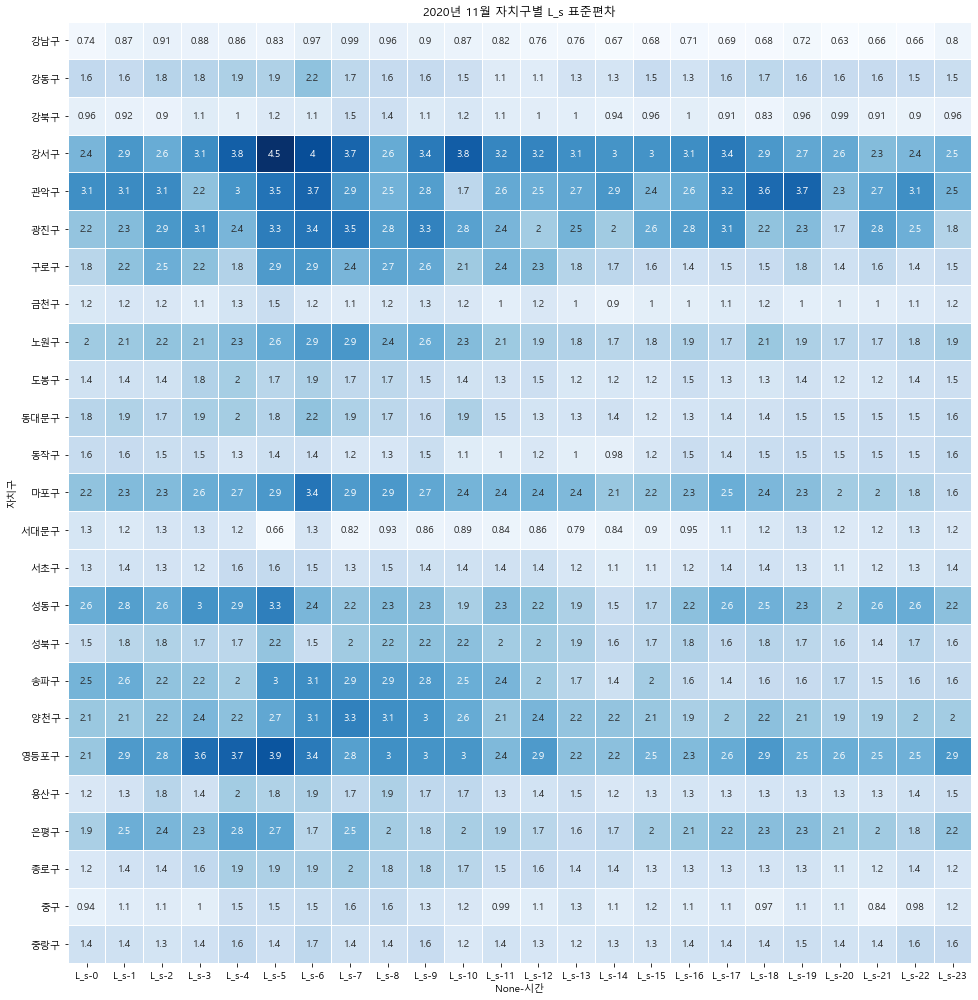

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   9.005762  14.064036  23.761207  28.031768  45.467236  42.260438   
강동구  10.903497  15.899148  28.658395  39.611682  66.017929  34.194971   
강북구   7.139907  15.602053  21.271725  25.775793  31.859515  32.442815   
강서구  15.500967  36.190890  50.971563  56.059747  95.131961  59.162948   
관악구   6.701759  11.535822  18.011706  30.068174  44.168996  36.843429   

                                                                             \
시간          6          7         8         9         10        11        12   
자치구                                                                           
강남구  38.341851  13.226301  8.236967  6.739344  6.981023  5.852236  4.474917   
강동구  23.959615   8.952960  4.548603  7.993578  9.425928  6.147986  5.467398   
강북구  35.245586  12.322761  6.611496  7.254129  9.252387  8.848365  5.650471   
강서구  54.031053  12.421711  4.350260  7.077070  8.638619  6.742915  5.603145   
관악구  39.672950  12.314952  8.616988  6.224544  7.000479  5.885634  4.746767   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.312379  3.906711  3.650245  3.013552  2.453741  2.262171  3.552044   
강동구  4.859240  4.148479  4.360793  3.766729  3.682531  3.230866  4.597446   
강북구  4.926883  4.554865  4.169390  3.994046  3.618401  3.147570  4.282857   
강서구  5.441849  5.190934  4.801947  4.373441  3.596593  3.365688  4.883705   
관악구  4.417624  4.590041  4.410649  4.245660  3.624262  3.065573  3.991463   

                                              
시간         20        21        22         23  
자치구                                           
강남구  4.640527  5.471030  6.784809  11.843624  
강동구  4.804901  5.526273  5.828192  10.676151  
강북구  4.961400  5.680509  7.069106  10.855046  
강서구  5.682461  6.172520  7.971715  13.559470  
관악구  4.285571  4.801628  5.461948   7.678306

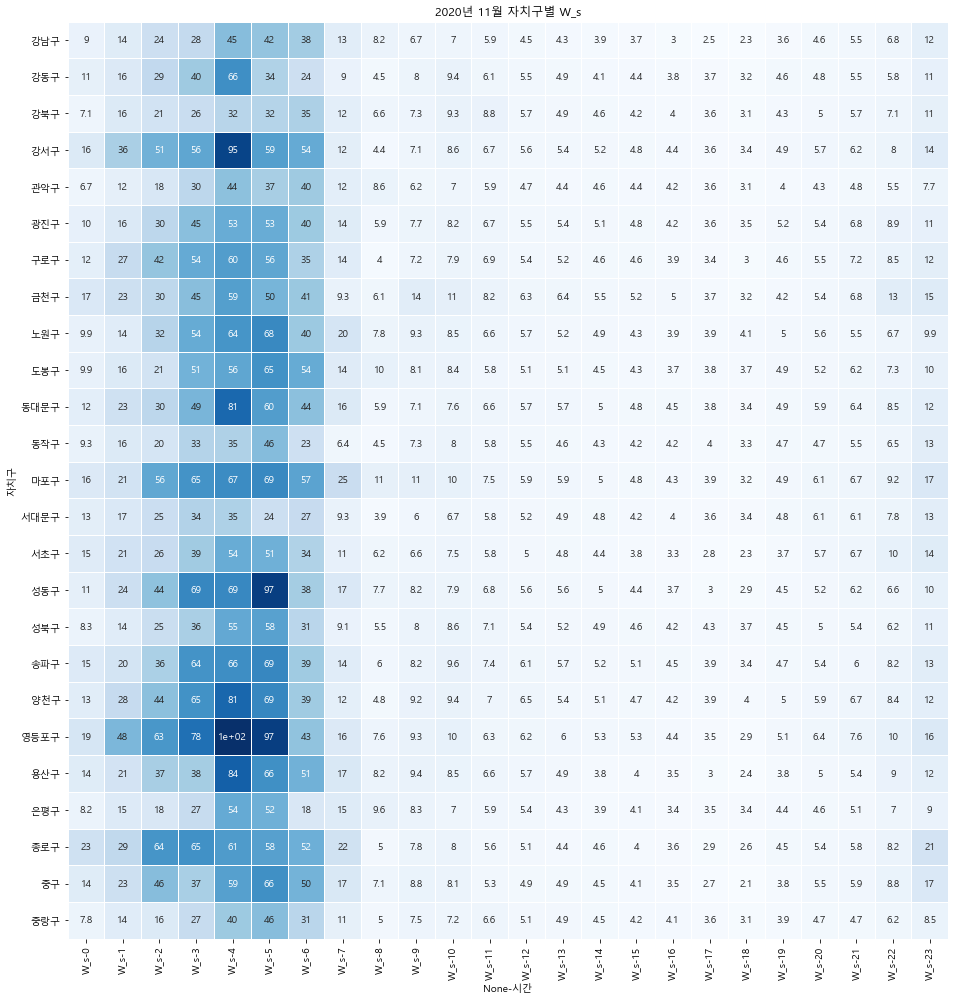

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                          \
시간          0          1          2          3           4          5    
자치구                                                                      
강남구  10.893215  19.239472  60.485290  48.681752   71.282061  70.907866   
강동구  16.422492  19.508149  35.298449  74.807278  113.500795  67.068419   
강북구   7.794135  24.301439  37.259586  30.511811   40.122330  45.584751   
강서구  20.812339  54.046771  68.531881  69.722657  189.250053  89.645666   
관악구   7.287161  11.932479  23.198851  46.612416   70.548219  48.811421   

                                                                       \
시간           6          7          8         9          10         11   
자치구                                                                     
강남구   75.256265  19.127891  17.060375  7.877928   7.025894   5.645571   
강동구   37.153317  15.998958   4.714147  8.986897  13.902692   5.314955   
강북구   52.780804  13.892410   6.829821  6.507103   6.005733  15.930095   
강서구  120.540575  22.394914   6.794734  6.959858   7.189675   4.792774   
관악구   71.889251  16.251194  29.565847  5.061164   6.880354   3.764683   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  3.944913  3.437816  3.206841  3.026851  2.482895  2.322369  2.219241   
강동구  4.807809  3.431038  2.969492  3.152363  2.719352  2.686357  2.437307   
강북구  3.780577  3.412585  3.274854  2.801455  2.344529  2.078353  2.126397   
강서구  2.786640  3.575187  2.557741  2.613454  2.460485  1.869270  2.186481   
관악구  2.851503  2.633678  2.797458  2.561850  2.718368  2.207791  1.781450   

                                                        
시간         19        20        21        22         23  
자치구                                                     
강남구  2.970476  4.485774  5.093398  6.245367  15.424164  
강동구  5.082799  4.128603  7.104103  4.668655  15.234399  
강북구  2.739890  3.393978  4.462815  7.049839  17.574960  
강서구  2.747927  3.199294  4.006421  5.693528  15.144517  
관악구  2.426999  2.767976  3.672031  3.568848   5.707723

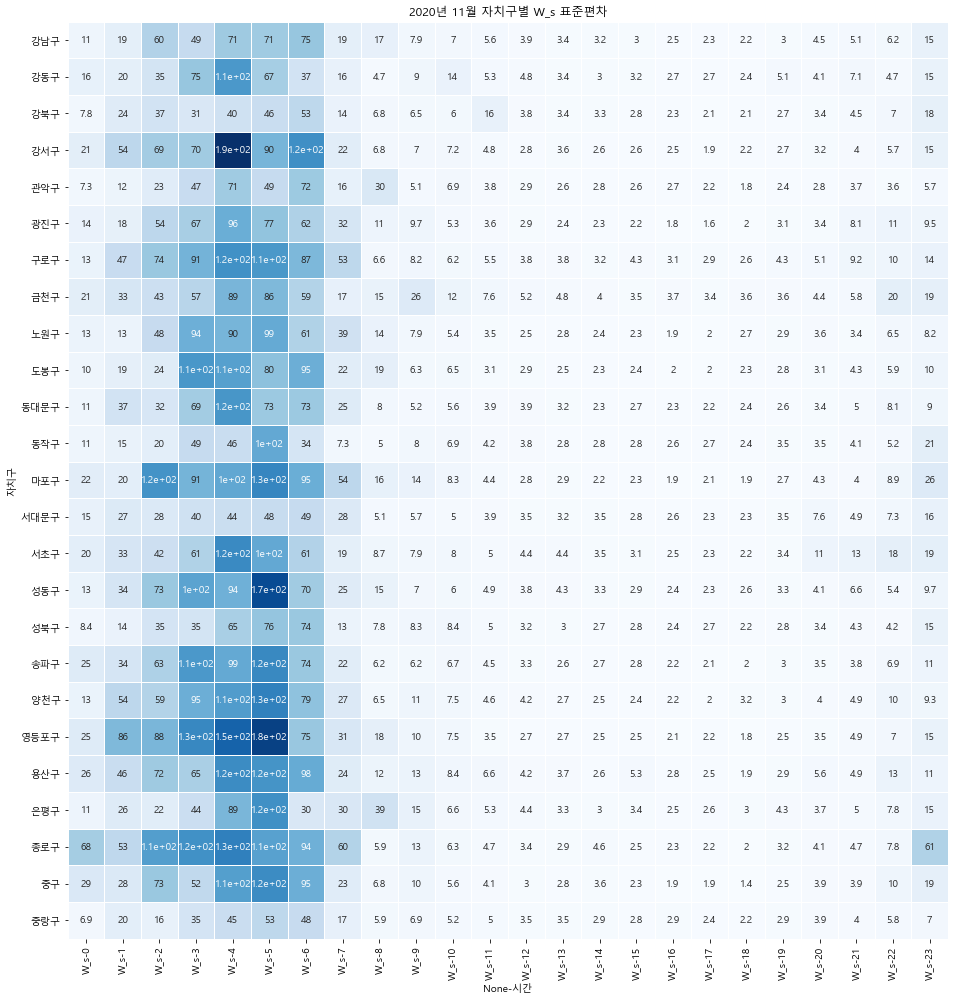

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2049,흑석한강푸르지오(110동)
2050,흥국사 정류장
2051,희성오피앙
2052,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '목동1단지아파트 118동 앞 (월촌초등학교 정류소 옆)',
 '목동1단지아파트 상가 앞 (월촌중학교 버스정류소 옆)',
 '묘곡초등학교',
 '문래중학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',

In [43]:
len(school)

134

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
965,강서구,KC 대학교,0,0.066667,0.008333,8.000000,0.888889,120.000000,학교
966,강서구,KC 대학교,1,0.116667,0.033333,3.500000,0.777778,30.000000,학교
967,강서구,KC 대학교,2,0.116667,0.016667,7.000000,0.875000,60.000000,학교
968,강서구,KC 대학교,3,0.066667,0.066667,1.000000,0.500000,15.000000,학교
969,강서구,KC 대학교,4,0.075000,0.008333,9.000000,0.900000,120.000000,학교
...,...,...,...,...,...,...,...,...,...
49370,동대문구,휘봉고등학교 앞,20,0.283333,0.250000,1.133333,1.083225,6.125000,학교
49371,동대문구,휘봉고등학교 앞,21,0.300000,0.141667,2.117647,1.458352,11.853496,학교
49372,동대문구,휘봉고등학교 앞,22,0.308333,0.116667,2.642857,1.563130,14.789916,학교
49373,동대문구,휘봉고등학교 앞,23,0.233333,0.158333,1.473684,1.252236,10.078387,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대역 1번출구',
 '낙성대역 3번출구 뒤',
 '낙성대역 8번 출구',
 

In [46]:
len(subway)

408

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
73,강남구,3호선 매봉역 3번출구앞,0,0.075000,0.216667,0.346154,0.471145,6.459676,지하철
74,강남구,3호선 매봉역 3번출구앞,1,0.150000,0.175000,0.857143,1.308597,10.843645,지하철
75,강남구,3호선 매봉역 3번출구앞,2,0.058333,0.133333,0.437500,0.625659,11.276978,지하철
76,강남구,3호선 매봉역 3번출구앞,3,0.166667,0.091667,1.818182,2.180670,25.925653,지하철
77,강남구,3호선 매봉역 3번출구앞,4,0.083333,0.008333,10.000000,2.889289,347.027027,지하철
...,...,...,...,...,...,...,...,...,...
49466,동작구,흑석역 4번출구,19,0.283333,0.375000,0.755556,0.430380,2.666667,지하철
49467,동작구,흑석역 4번출구,20,0.225000,0.208333,1.080000,0.519231,4.800000,지하철
49468,동작구,흑석역 4번출구,21,0.250000,0.250000,1.000000,0.500000,4.000000,지하철
49469,동작구,흑석역 4번출구,22,0.166667,0.133333,1.250000,0.555556,7.500000,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피스아파트 앞',
 '면목 대원칸타빌아파트',
 '면목도시개발아파트 1동 앞',
 '면목삼익아파트 앞',
 '목동11단지 아파트',
 '목동5단지아파트 501동',
 '목동5단지아파트 534동

In [49]:
len(apart)

179

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
460,서대문구,DMC센트럴아이파크아파트,0,0.391667,0.316667,1.236842,2.417017,8.723236,아파트
461,서대문구,DMC센트럴아이파크아파트,1,0.183333,0.225000,0.814815,1.597674,9.986671,아파트
462,서대문구,DMC센트럴아이파크아파트,2,0.158333,0.166667,0.950000,1.897530,14.615587,아파트
463,서대문구,DMC센트럴아이파크아파트,3,0.183333,0.116667,1.571429,2.832589,26.011204,아파트
464,서대문구,DMC센트럴아이파크아파트,4,0.100000,0.083333,1.200000,2.359493,32.709389,아파트
...,...,...,...,...,...,...,...,...,...
48646,서대문구,홍은센트레빌 아파트 앞,19,0.025000,0.141667,0.176471,0.000000,0.000000,아파트
48647,서대문구,홍은센트레빌 아파트 앞,20,0.041667,0.041667,1.000000,0.000000,0.000000,아파트
48648,서대문구,홍은센트레빌 아파트 앞,21,0.075000,0.116667,0.642857,0.000000,0.000000,아파트
48649,서대문구,홍은센트레빌 아파트 앞,22,0.075000,0.058333,1.285714,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 '연

In [52]:
len(park)

104

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2531,마포구,가온문화공원,0,0.041667,0.050000,0.833333,1.274218,37.582418,공원
2532,마포구,가온문화공원,1,0.066667,0.050000,1.333333,1.851429,43.783784,공원
2533,마포구,가온문화공원,2,0.025000,0.033333,0.750000,1.148571,54.324324,공원
2534,마포구,가온문화공원,3,0.025000,0.058333,0.428571,0.610345,25.605787,공원
2535,마포구,가온문화공원,4,0.000000,0.008333,0.000000,0.000000,0.000000,공원
...,...,...,...,...,...,...,...,...,...
49297,중구,훈련원공원주차장 앞,20,0.233333,0.308333,0.756757,1.159055,5.891536,공원
49298,중구,훈련원공원주차장 앞,21,0.266667,0.233333,1.142857,1.666077,8.951817,공원
49299,중구,훈련원공원주차장 앞,22,0.208333,0.358333,0.581395,0.872902,4.618923,공원
49300,중구,훈련원공원주차장 앞,23,0.183333,0.225000,0.814815,1.247001,8.286294,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.066667,0.008333,8.000000,0.888889,120.000000,학교
1,강서구,KC 대학교,1,0.116667,0.033333,3.500000,0.777778,30.000000,학교
2,강서구,KC 대학교,2,0.116667,0.016667,7.000000,0.875000,60.000000,학교
3,강서구,KC 대학교,3,0.066667,0.066667,1.000000,0.500000,15.000000,학교
4,강서구,KC 대학교,4,0.075000,0.008333,9.000000,0.900000,120.000000,학교
...,...,...,...,...,...,...,...,...,...
19945,중구,훈련원공원주차장 앞,20,0.233333,0.308333,0.756757,1.159055,5.891536,공원
19946,중구,훈련원공원주차장 앞,21,0.266667,0.233333,1.142857,1.666077,8.951817,공원
19947,중구,훈련원공원주차장 앞,22,0.208333,0.358333,0.581395,0.872902,4.618923,공원
19948,중구,훈련원공원주차장 앞,23,0.183333,0.225000,0.814815,1.247001,8.286294,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.179526  0.136349  0.094603  0.067388  0.043429  0.041667  0.083253   
아파트  0.187562  0.150774  0.107821  0.064851  0.047346  0.037942  0.042691   
지하철  0.229016  0.212017  0.158742  0.110519  0.075347  0.085355  0.158762   
학교   0.155022  0.136152  0.088704  0.059568  0.037407  0.032160  0.040185   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.151683  0.370192  0.235657  0.199359  0.223638  0.305929  0.328686   
아파트  0.131844  0.295438  0.173231  0.150885  0.188687  0.242458  0.263222   
지하철  0.389563  0.711540  0.439706  0.349837  0.403268  0.484457  0.526103   
학교   0.122407  0.322407  0.212840  0.164938  0.174877  0.245617  0.270185   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.345753  0.399038  0.472115  0.575721  0.710096  0.535497  0.405369   
아파트  0.285987  0.332775  0.386639  0.497346  0.690037  0.543994  0.399581   
지하철  0.554963  0.613092  0.704473  0.915809  1.119833  0.776450  0.576920   
학교   0.277531  0.315988  0.349691  0.406975  0.563148  0.423765  0.332963   

                                   
시간         21        22        23  
특성                                 
공원   0.419071  0.362901  0.267388  
아파트  0.408007  0.390177  0.275372  
지하철  0.549387  0.467443  0.318219  
학교   0.326481  0.306481  0.220309

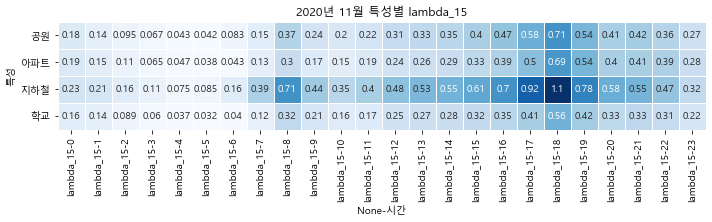

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.198556  0.143233  0.104128  0.066960  0.053601  0.058270  0.128600   
아파트  0.167583  0.129668  0.094674  0.063103  0.045698  0.053484  0.064879   
지하철  0.220760  0.190061  0.146901  0.104850  0.073259  0.101912  0.182638   
학교   0.173058  0.130688  0.091023  0.074539  0.044527  0.043339  0.058889   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.282748  0.507978  0.280152  0.189449  0.203913  0.247470  0.297848   
아파트  0.244148  0.615363  0.202520  0.157294  0.160624  0.217022  0.222792   
지하철  0.479072  0.785906  0.403616  0.303424  0.328955  0.397652  0.427987   
학교   0.145864  0.382705  0.258493  0.183912  0.155189  0.220201  0.224277   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.286467  0.349117  0.423852  0.466336  0.582208  0.439504  0.353275   
아파트  0.228978  0.262211  0.302854  0.367894  0.516304  0.403589  0.293996   
지하철  0.457518  0.504461  0.597121  0.779808  0.925478  0.621342  0.487493   
학교   0.236579  0.277645  0.311040  0.363143  0.523222  0.373788  0.285850   

                                   
시간         21        22        23  
특성                                 
공원   0.371044  0.337572  0.258254  
아파트  0.312128  0.293573  0.212038  
지하철  0.469895  0.389117  0.270533  
학교   0.274443  0.265277  0.200498

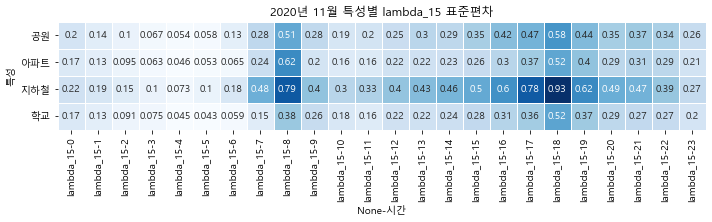

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.136853  0.113968  0.082381  0.048638  0.040545  0.066426  0.103446   
아파트  0.154105  0.127140  0.088361  0.055493  0.044181  0.066853  0.140130   
지하철  0.253571  0.201711  0.150061  0.102247  0.068995  0.060641  0.110294   
학교   0.119150  0.106189  0.067963  0.046111  0.033148  0.050741  0.110988   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.352083  0.496795  0.303285  0.230369  0.284936  0.352965  0.362340   
아파트  0.400419  0.535196  0.275978  0.233380  0.249209  0.290829  0.301490   
지하철  0.319628  0.714032  0.426042  0.331883  0.397283  0.476552  0.530576   
학교   0.295000  0.425370  0.251790  0.209321  0.237901  0.280000  0.291049   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.378125  0.426603  0.490625  0.560897  0.641026  0.407372  0.360256   
아파트  0.323976  0.346276  0.399022  0.467318  0.523883  0.377002  0.328259   
지하철  0.570772  0.623775  0.688787  0.855392  1.116728  0.790523  0.625940   
학교   0.326790  0.369568  0.409691  0.445000  0.430247  0.328333  0.274012   

                                   
시간         21        22        23  
특성                                 
공원   0.329808  0.267308  0.180128  
아파트  0.306611  0.262523  0.177235  
지하철  0.580556  0.487827  0.337868  
학교   0.251358  0.212901  0.152407

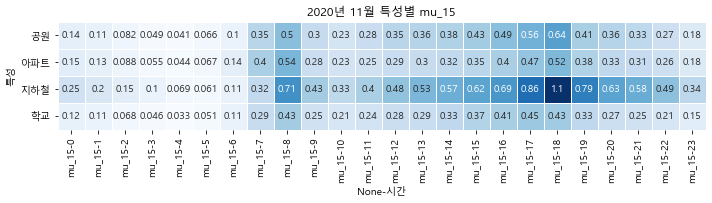

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.146658  0.110212  0.085495  0.053392  0.052539  0.084078  0.122285   
아파트  0.137385  0.104407  0.068510  0.052438  0.054687  0.076218  0.129592   
지하철  0.230074  0.176409  0.132140  0.103196  0.071841  0.065679  0.112112   
학교   0.124047  0.100482  0.071721  0.044223  0.041945  0.073227  0.143804   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.345927  0.483621  0.249607  0.176253  0.210428  0.254932  0.288962   
아파트  0.345842  0.455323  0.215280  0.169518  0.213576  0.201560  0.198889   
지하철  0.335471  0.741181  0.353066  0.247219  0.295775  0.359292  0.404741   
학교   0.306881  0.397129  0.215807  0.155380  0.182741  0.209690  0.222516   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.300611  0.352168  0.394448  0.496968  0.559705  0.352578  0.298168   
아파트  0.226579  0.239946  0.286203  0.418470  0.504219  0.275335  0.250562   
지하철  0.446867  0.491675  0.561378  0.708299  0.949513  0.660975  0.517210   
학교   0.232219  0.275977  0.304699  0.366367  0.395393  0.269839  0.223078   

                                   
시간         21        22        23  
특성                                 
공원   0.276572  0.225644  0.160850  
아파트  0.239294  0.213575  0.142856  
지하철  0.479096  0.405502  0.283400  
학교   0.222397  0.210010  0.151043

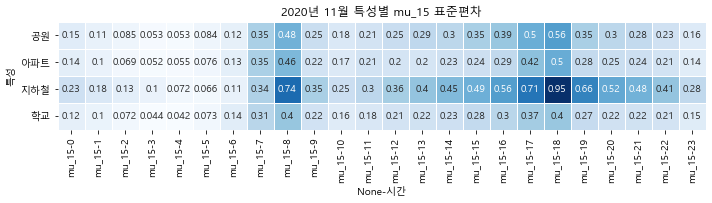

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.197474  1.492150  1.319389  1.807995  1.016671  1.471076  1.743041   
아파트  1.261957  1.453395  1.635798  1.580810  1.552274  1.033838  0.585242   
지하철  0.815988  1.181475  1.231992  1.238550  1.522959  2.010964  2.114160   
학교   1.410558  1.423265  1.757857  1.436516  1.374506  0.920387  1.072878   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.809910  1.363564  0.983555  0.986691  0.796951  0.862334  0.899070   
아파트  0.475545  0.621523  0.687791  0.629326  0.835555  0.793324  0.814113   
지하철  1.592826  1.182408  1.135382  1.106307  1.039676  1.032871  0.990121   
학교   0.950002  1.944201  1.271390  0.891731  0.768780  0.913479  1.000214   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.934023  0.970324  0.982337  1.127287  1.246227  1.474327  1.184179   
아파트  0.878666  0.958736  0.991543  1.166782  1.551633  1.538892  1.311891   
지하철  0.977142  0.996532  1.032703  1.102351  1.079378  1.053544  0.975202   
학교   0.838122  0.868717  0.883302  1.004871  1.538035  1.460900  1.304523   

                                   
시간         21        22        23  
특성                                 
공원   1.580608  1.570074  1.747915  
아파트  1.498450  1.752118  1.951956  
지하철  1.014100  1.065822  1.066582  
학교   1.461965  1.733365  1.880241

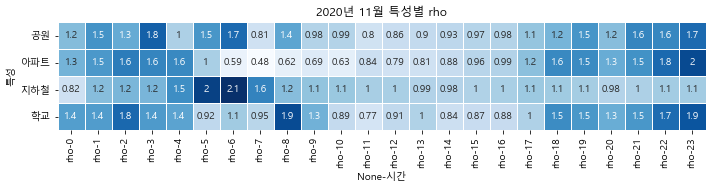

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.600215  1.761247  1.664686  1.738631  1.420824  0.973616  1.239640   
아파트  1.402720  1.554413  1.584084  1.504335  1.421367  0.755887  0.532767   
지하철  1.688003  2.284553  2.286064  2.245446  2.236125  2.762570  2.720503   
학교   1.170655  1.309353  1.344940  1.156136  1.086964  0.710129  0.520564   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.843657  1.170387  1.169319  1.264142  1.209026  1.298649  1.336502   
아파트  0.460286  0.671758  0.849175  0.838083  1.052376  1.154203  1.192114   
지하철  2.636177  2.346773  2.429026  2.442726  2.367261  2.398084  2.280191   
학교   0.641073  0.971567  0.920916  0.946097  0.873701  1.048331  1.066835   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.353209  1.448471  1.540742  1.610978  1.699441  1.826238  1.616331   
아파트  1.220443  1.340715  1.335320  1.474443  1.673483  1.750241  1.571428   
지하철  2.219680  2.258046  2.399439  2.469323  2.242299  2.156427  1.985889   
학교   1.033293  1.066030  1.043943  1.111292  1.391263  1.358251  1.349885   

                                   
시간         21        22        23  
특성                                 
공원   1.736319  1.795317  1.935157  
아파트  1.676074  1.789276  1.806315  
지하철  1.988285  1.995405  1.916305  
학교   1.376748  1.400673  1.432520

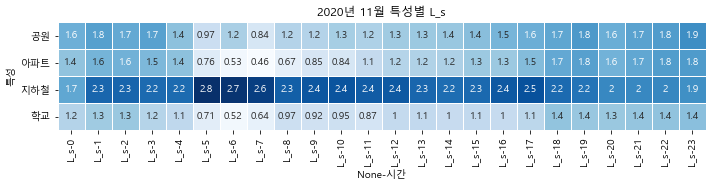

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.922389  2.245255  2.165486  2.103516  2.317040  1.758095  1.973521   
아파트  1.709680  1.674266  1.712063  1.759794  1.754936  1.054147  1.016514   
지하철  2.275648  2.712357  2.601943  2.735773  2.960758  3.881186  3.680318   
학교   1.404250  1.389356  1.534950  1.446124  1.517198  1.102106  0.950364   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.724994  1.912787  1.646007  1.635007  1.399353  1.273094  1.358737   
아파트  0.849976  1.079886  1.164803  0.951577  1.064948  1.227130  1.180542   
지하철  3.441050  3.002360  3.078496  2.967458  2.730865  2.693241  2.384090   
학교   1.132900  1.455207  1.317777  1.406640  0.918847  1.185054  1.125043   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   1.270585  1.466822  1.662853  1.584521  1.838647  1.854681  1.744484   
아파트  1.124240  1.330053  1.241601  1.377479  1.562275  1.615033  1.447525   
지하철  2.254147  2.344978  2.548145  2.646697  2.321086  2.199704  2.069238   
학교   1.197030  1.181423  1.125983  1.234360  1.567955  1.482517  1.464341   

                                   
시간         21        22        23  
특성                                 
공원   1.826797  1.979223  2.116695  
아파트  1.646278  1.786038  1.809335  
지하철  2.199306  2.193304  2.027766  
학교   1.490973  1.479690  1.522755

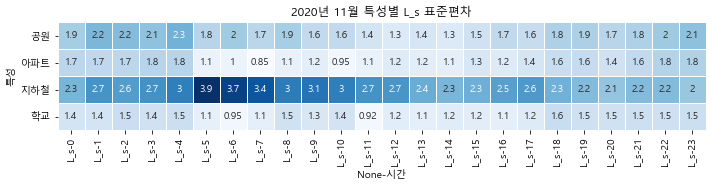

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   14.854645  29.212322  43.535630  61.443417  64.896114  56.975885   
아파트  10.903710  19.779915  29.697376  54.554615  66.873802  36.488636   
지하철   9.674685  19.956516  29.629198  43.136734  66.857864  88.031962   
학교   15.149217  21.026422  44.584606  40.421417  61.761755  37.397394   

                                                                              \
시간          6          7          8         9         10        11        12   
특성                                                                             
공원   40.077949  10.110826   6.072136  6.983194  8.880916  6.582020  5.167419   
아파트  15.929265   4.301654   3.174480  6.094755  6.195962  6.548322  5.540253   
지하철  47.599821  16.207807   5.678870  7.655202  8.870386  7.323719  5.925767   
학교   24.802203  12.605388  10.254921  7.070785  7.317715  6.378089  5.418556   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   5.123568  4.703991  4.886295  4.090097  3.793411  3.397172  5.933498   
아파트  5.141037  4.927877  4.778578  4.172619  3.977152  3.870770  5.009080   
지하철  5.127616  4.879194  4.412290  4.104477  3.443181  2.614384  3.581601   
학교   5.196004  4.605457  4.183703  3.722344  3.604102  4.069465  4.982423   

                                              
시간         20        21        22         23  
특성                                            
공원   5.718938  7.334475  8.523634  14.902878  
아파트  5.619294  6.377986  8.272369  12.579676  
지하철  4.465302  4.818458  6.024734   9.207566  
학교   6.004135  7.239880  9.391032  14.746522

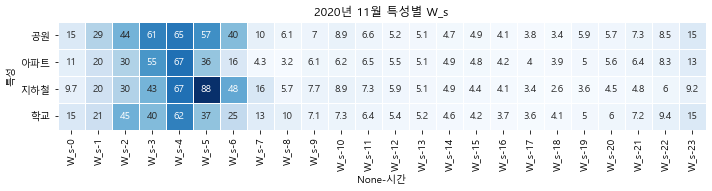

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                           \
시간          0          1          2          3           4           5    
특성                                                                        
공원   16.335275  48.424750  87.831250  87.535075  126.945109  119.091869   
아파트  12.142264  31.876249  41.031074  82.804512  104.773430   69.140087   
지하철  15.726481  32.035870  50.474059  69.092388  122.096231  130.128660   
학교   19.458412  22.977125  74.354700  64.402223   92.357227   64.090191   

                                                                              \
시간          6          7          8         9         10        11        12   
특성                                                                             
공원   72.099835  24.495432   9.433325  6.441316  8.048371  5.357732  3.629893   
아파트  28.778888   7.314138   3.886354  6.272441  4.710782  5.217981  4.149162   
지하철  64.789920  28.804687   6.245704  6.215464  5.904558  6.973862  3.482502   
학교   58.660992  38.043622  27.452774  7.852331  6.485217  5.238949  4.113724   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   3.397663  2.733009  4.597912  2.721333  2.475350  2.411873  5.466868   
아파트  3.385560  3.453626  3.340163  2.699556  2.825447  3.018773  3.500564   
지하철  2.584142  3.140849  2.340028  2.057054  1.845687  1.558971  2.069397   
학교   3.550667  3.138980  2.910992  2.524980  2.711924  3.108702  3.501844   

                                              
시간         20        21        22         23  
특성                                            
공원   3.917929  7.642914  6.675415  16.499371  
아파트  4.253559  4.980322  8.607072  13.317356  
지하철  2.881377  3.079560  4.389333   8.214096  
학교   4.451301  6.922453  8.244506  17.974222

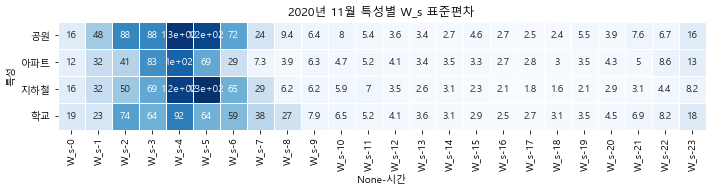

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 11월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()